AIM: To create a Time Series Forecast on Pollution data from a locality within New Delhi India.

WHY?: I am personally interested to see how this can be done and as a result what the possible implications could be if I worked within enviromental department looking at historical pollution levels. 

The dataset had a lot of features I could have focussed on but I chose to look at Particulate Matter 2.5."Particulate matter" (PM) or "particle pollution" is a mixture of tiny solid particles and liquid droplets suspended in the air. These particles come in various sizes and shapes and can be composed of hundreds of different chemicals.The "2.5" in PM2.5 refers to its size. PM2.5 are fine inhalable particles with a diameter of 2.5 micrometers (µm) or less.

PM2.5 particles can originate from various sources, both natural and human-made:

Combustion sources: This is a major contributor.
Vehicle exhausts (cars, trucks, buses)
Industrial processes (power plants, factories)
Burning wood (wood heaters, wildfires)
Agricultural burning
Complex atmospheric reactions: Many particles form in the atmosphere as a result of chemical reactions between pollutants like sulfur dioxide and nitrogen oxides (from power plants, industries, and vehicles).
Other sources: Dust, dirt, soot, smoke.
4. Why is PM2.5 a concern for health?

Because of their extremely small size, PM2.5 particles are the most dangerous air pollutant:

Deep lung penetration: Unlike larger particles (PM10) that tend to get filtered in the nose and throat or settle in the upper airways, PM2.5 particles are so small they can travel deep into your respiratory tract, reaching the deepest parts of your lungs.
Entry into bloodstream: Some particles can even pass from the lungs into the bloodstream and be transported throughout the body, affecting various organs.
Serious health impacts: Exposure to PM2.5 is linked to a wide range of severe health problems, both short-term and long-term:
Respiratory issues: Asthma attacks, acute and chronic bronchitis, reduced lung function, coughing, wheezing, shortness of breath.
Cardiovascular problems: Increased risk of heart attacks, strokes, irregular heartbeats, increased hospital admissions for heart disease.
Other serious conditions: Lung cancer, lower respiratory infections (like pneumonia), type 2 diabetes, adverse birth outcomes, and emerging evidence suggests links to dementia.
Vulnerable populations: Children, older adults, pregnant women, and individuals with pre-existing heart or lung diseases are particularly sensitive to PM2.5 exposure.
5. How is PM2.5 measured?

PM2.5 concentrations are typically measured in micrograms per cubic meter of air (μg/m 3)

In [1]:
import pandas as pd


filepath='DL024-Rohini.csv'



rohini_data=pd.read_csv(filepath)

DATA CLEANING

In [2]:
display(rohini_data.head())

,Date,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),RH (%),WS (m/s),SR (W/mt2),AT (degree C)
0,02/02/2018,NaN,NaN,24.69,35.23,115.07,5.94,1.21,NaN,84.75,0.98,3.08,15.54
1,02/02/2018,113.0,266.0,22.21,38.51,111.67,4.62,1.35,NaN,87.83,1.22,3.00,14.78
2,02/02/2018,112.0,246.0,24.27,34.75,120.87,4.96,1.28,NaN,92.92,0.52,3.42,13.67
3,02/02/2018,134.0,279.0,22.88,43.23,116.66,3.64,1.35,NaN,96.80,0.64,3.10,12.82
4,02/02/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
primary_pollutants=rohini_data[['Date','PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)','CO (mg/m3)', 'SO2 (ug/m3)' ]].copy()

In [4]:
##filtered the dataset to focus on main pollutants
display(primary_pollutants)

,Date,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),CO (mg/m3),SO2 (ug/m3)
0,02/02/2018,NaN,NaN,24.69,1.21,5.94
1,02/02/2018,113.00,266.00,22.21,1.35,4.62
2,02/02/2018,112.00,246.00,24.27,1.28,4.96
3,02/02/2018,134.00,279.00,22.88,1.35,3.64
4,02/02/2018,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
45211,31/03/2023,35.75,49.00,19.80,0.67,2.25
45212,31/03/2023,31.75,49.75,25.55,0.73,2.45
45213,31/03/2023,40.25,70.75,36.43,0.80,2.52
45214,31/03/2023,39.75,94.25,24.62,0.73,2.47


In [5]:
#checked for nulls
primary_pollutants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           45216 non-null  object 
 1   PM2.5 (ug/m3)  44094 non-null  float64
 2   PM10 (ug/m3)   44134 non-null  float64
 3   NO2 (ug/m3)    43814 non-null  float64
 4   CO (mg/m3)     42927 non-null  float64
 5   SO2 (ug/m3)    43406 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.1+ MB


In [6]:
primary_pollutants.isnull().sum()

Date                0
PM2.5 (ug/m3)    1122
PM10 (ug/m3)     1082
NO2 (ug/m3)      1402
CO (mg/m3)       2289
SO2 (ug/m3)      1810
dtype: int64

In [7]:
#changed format of date column
primary_pollutants.loc[:, 'Date'] = pd.to_datetime(primary_pollutants['Date'],format='%d/%m/%Y')

In [8]:
#set index as date
primary_pollutants = primary_pollutants.set_index('Date')

display(primary_pollutants.head())

,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),CO (mg/m3),SO2 (ug/m3)
Date,,,,,
2018-02-02,NaN,NaN,24.69,1.21,5.94
2018-02-02,113.0,266.0,22.21,1.35,4.62
2018-02-02,112.0,246.0,24.27,1.28,4.96
2018-02-02,134.0,279.0,22.88,1.35,3.64
2018-02-02,NaN,NaN,NaN,NaN,NaN


In [9]:
print(primary_pollutants.index.min())
print(primary_pollutants.index.max())

2018-02-02 00:00:00
2023-03-31 00:00:00


In [10]:
#dealing with nulls by backfilling
primary_pollutants['PM2.5 (ug/m3)']= primary_pollutants['PM2.5 (ug/m3)'].fillna(method='bfill')

In [11]:
primary_pollutants['PM2.5 (ug/m3)']= primary_pollutants['PM2.5 (ug/m3)'].fillna(method='bfill')
primary_pollutants['PM10 (ug/m3)']= primary_pollutants['PM10 (ug/m3)'].fillna(method='bfill')
primary_pollutants['NO2 (ug/m3)']= primary_pollutants['NO2 (ug/m3)'].fillna(method='bfill')
primary_pollutants['CO (mg/m3)']= primary_pollutants['CO (mg/m3)'].fillna(method='bfill')
primary_pollutants['SO2 (ug/m3)']= primary_pollutants['SO2 (ug/m3)'].fillna(method='bfill')


In [12]:
primary_pollutants.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45216 entries, 2018-02-02 to 2023-03-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PM2.5 (ug/m3)  45216 non-null  float64
 1   PM10 (ug/m3)   45216 non-null  float64
 2   NO2 (ug/m3)    45216 non-null  float64
 3   CO (mg/m3)     45216 non-null  float64
 4   SO2 (ug/m3)    45216 non-null  float64
dtypes: float64(5)
memory usage: 2.1 MB


In [13]:
display(primary_pollutants)

,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),CO (mg/m3),SO2 (ug/m3)
Date,,,,,
2018-02-02,113.00,266.00,24.69,1.21,5.94
2018-02-02,113.00,266.00,22.21,1.35,4.62
2018-02-02,112.00,246.00,24.27,1.28,4.96
2018-02-02,134.00,279.00,22.88,1.35,3.64
2018-02-02,134.00,279.00,36.34,0.00,5.33
...,...,...,...,...,...
2023-03-31,35.75,49.00,19.80,0.67,2.25
2023-03-31,31.75,49.75,25.55,0.73,2.45
2023-03-31,40.25,70.75,36.43,0.80,2.52


In [14]:
print(primary_pollutants.index.min())
print(primary_pollutants.index.max())

2018-02-02 00:00:00
2023-03-31 00:00:00


In [15]:
#resampling to daily average
daily_avg_data = primary_pollutants.resample('D').mean()

display(daily_avg_data)

,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),CO (mg/m3),SO2 (ug/m3)
Date,,,,,
2018-02-02,138.166667,313.875000,27.149167,0.795417,6.352917
2018-02-03,143.625000,331.708333,36.870833,0.870000,10.299583
2018-02-04,161.333333,343.375000,29.441250,0.827083,9.719167
2018-02-05,215.378333,435.965417,44.418750,1.131667,12.374583
2018-02-06,166.017500,362.830417,25.570833,0.810833,10.677917
...,...,...,...,...,...
2023-03-27,71.343750,145.583333,11.858333,0.583750,7.262083
2023-03-28,81.406250,184.208333,21.301667,0.745417,7.344583
2023-03-29,102.104167,215.343750,32.120833,1.057917,8.317083


In [16]:
#resampled to monthly average
monthly_avg_data=primary_pollutants.resample('M').mean()

In [17]:
monthly_avg_data.shape

(62, 5)

In [18]:
display(monthly_avg_data.head())

,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),CO (mg/m3),SO2 (ug/m3)
Date,,,,,
2018-02-28,153.723750,343.013472,45.789182,1.092901,11.641759
2018-03-31,101.643011,313.754960,31.477648,1.051398,12.997191
2018-04-30,92.710875,359.246972,28.217278,0.979722,10.029917
2018-05-31,90.663763,319.399637,31.377379,0.948333,8.561263
2018-06-30,77.283028,285.291014,13.732611,0.597722,8.174042


In [19]:
daily_avg_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1884 entries, 2018-02-02 to 2023-03-31
Freq: D
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PM2.5 (ug/m3)  1884 non-null   float64
 1   PM10 (ug/m3)   1884 non-null   float64
 2   NO2 (ug/m3)    1884 non-null   float64
 3   CO (mg/m3)     1884 non-null   float64
 4   SO2 (ug/m3)    1884 non-null   float64
dtypes: float64(5)
memory usage: 88.3 KB


VISUALISING THE TIME SERIES

In [20]:
import matplotlib.pyplot as plt

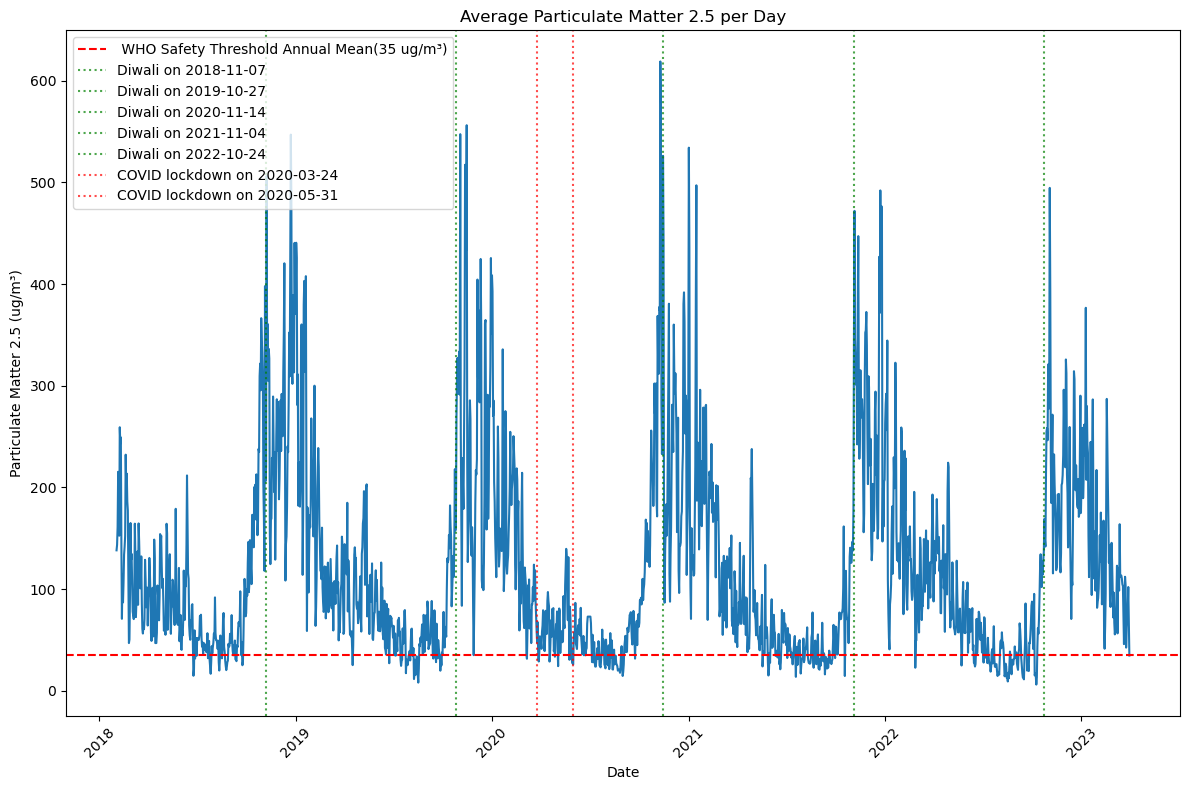

In [21]:
#DAILY DATA
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(daily_avg_data.index, daily_avg_data['PM2.5 (ug/m3)'])

# Add the horizontal line for the safety threshold
ax.axhline(y=35, color='r', linestyle='--', label=' WHO Safety Threshold Annual Mean(35 ug/m³)')

ax.set_title('Average Particulate Matter 2.5 per Day')
ax.set_xlabel('Date')
ax.set_ylabel('Particulate Matter 2.5 (ug/m³)')
ax.xaxis.set_tick_params(rotation=45)

# Add constant vertical lines for specific dates
important_dates = ['2018-11-07', '2019-10-27', '2020-11-14','2021-11-04','2022-10-24']  # Diwali dates

for date_str in important_dates:
    try:
        date_to_plot = pd.to_datetime(date_str)  # Convert string to datetime object (if index is datetime)
        ax.axvline(x=date_to_plot, color='g', linestyle=':', alpha=0.7, label=f'Diwali on {date_str}')
    except ValueError:
        print(f"Warning: Could not parse date string: {date_str}")
        
# Add constant vertical lines for specific dates
covid_dates = ['2020-03-24','2020-05-31']  # COVID lockdowns dates

for date_str in covid_dates:
    try:
        date_to_plot = pd.to_datetime(date_str)  # Convert string to datetime object (if index is datetime)
        ax.axvline(x=date_to_plot, color='r', linestyle=':', alpha=0.7, label=f'COVID lockdown on {date_str}')
    except ValueError:
        print(f"Warning: Could not parse date string: {date_str}")   

# To avoid duplicate labels in the legend, we can handle them more carefully
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Add a legend to explain the constant line
ax.legend()

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

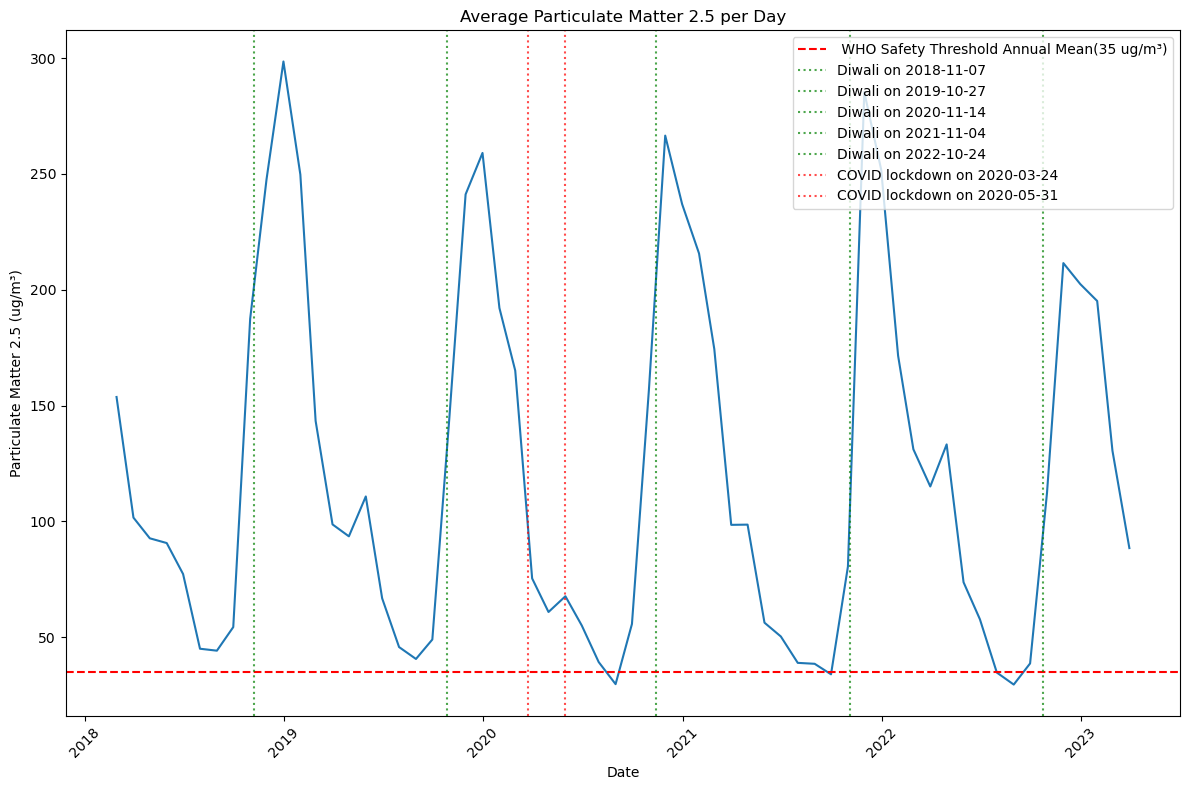

In [22]:
#TO SMOOTH IT OUT I USED THE MONTHLY RESAMPLED DATA
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(monthly_avg_data.index, monthly_avg_data['PM2.5 (ug/m3)'])

# Add the horizontal line for the safety threshold
ax.axhline(y=35, color='r', linestyle='--', label=' WHO Safety Threshold Annual Mean(35 ug/m³)')

ax.set_title('Average Particulate Matter 2.5 per Day')
ax.set_xlabel('Date')
ax.set_ylabel('Particulate Matter 2.5 (ug/m³)')
ax.xaxis.set_tick_params(rotation=45)

# Add constant vertical lines for specific dates
important_dates = ['2018-11-07', '2019-10-27', '2020-11-14','2021-11-04','2022-10-24']  # Diwali dates

for date_str in important_dates:
    try:
        date_to_plot = pd.to_datetime(date_str)  # Convert string to datetime object (if index is datetime)
        ax.axvline(x=date_to_plot, color='g', linestyle=':', alpha=0.7, label=f'Diwali on {date_str}')
    except ValueError:
        print(f"Warning: Could not parse date string: {date_str}")

        
# Add constant vertical lines for specific dates
covid_dates = ['2020-03-24','2020-05-31']  # COVID lockdowns dates

for date_str in covid_dates:
    try:
        date_to_plot = pd.to_datetime(date_str)  # Convert string to datetime object (if index is datetime)
        ax.axvline(x=date_to_plot, color='r', linestyle=':', alpha=0.7, label=f'COVID lockdown on {date_str}')
    except ValueError:
        print(f"Warning: Could not parse date string: {date_str}")        
# To avoid duplicate labels in the legend, we can handle them more carefully
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Add a legend to explain the constant line
ax.legend()

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [23]:
#UNDERSTANDING STATIONARITY
from statsmodels.tsa.stattools import adfuller

pm25_series = monthly_avg_data['PM2.5 (ug/m3)'].dropna()

# Perform the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(pm25_series)

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

print('\nInterpretation:')
if adf_result[1] > 0.05:
    print('The p-value is greater than 0.05, so the null hypothesis (the time series is non-stationary) cannot be rejected.')
    print('The data is likely non-stationary.')
else:
    print('The p-value is less than or equal to 0.05, so the null hypothesis (the time series is non-stationary) is rejected.')
    print('The data is likely stationary.')


C:\Users\ashish.sharma\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ADF Statistic: -1.3778040784666787
p-value: 0.5928696603866132
Critical Values:
   1%: -3.568485864
   5%: -2.92135992
   10%: -2.5986616

Interpretation:
The p-value is greater than 0.05, so the null hypothesis (the time series is non-stationary) cannot be rejected.
The data is likely non-stationary.


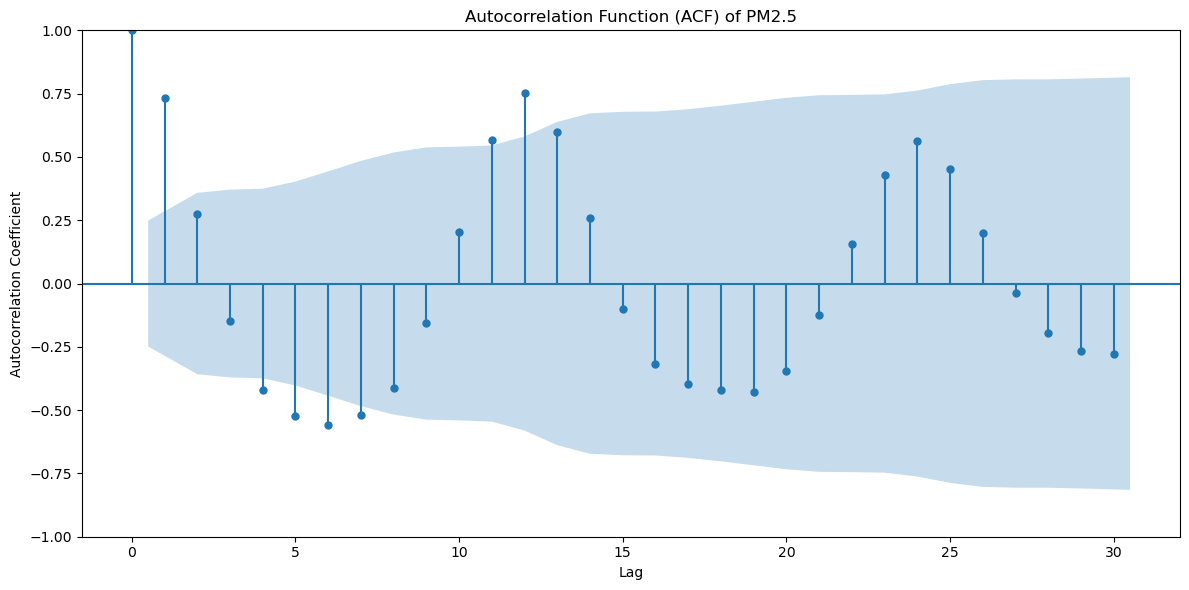

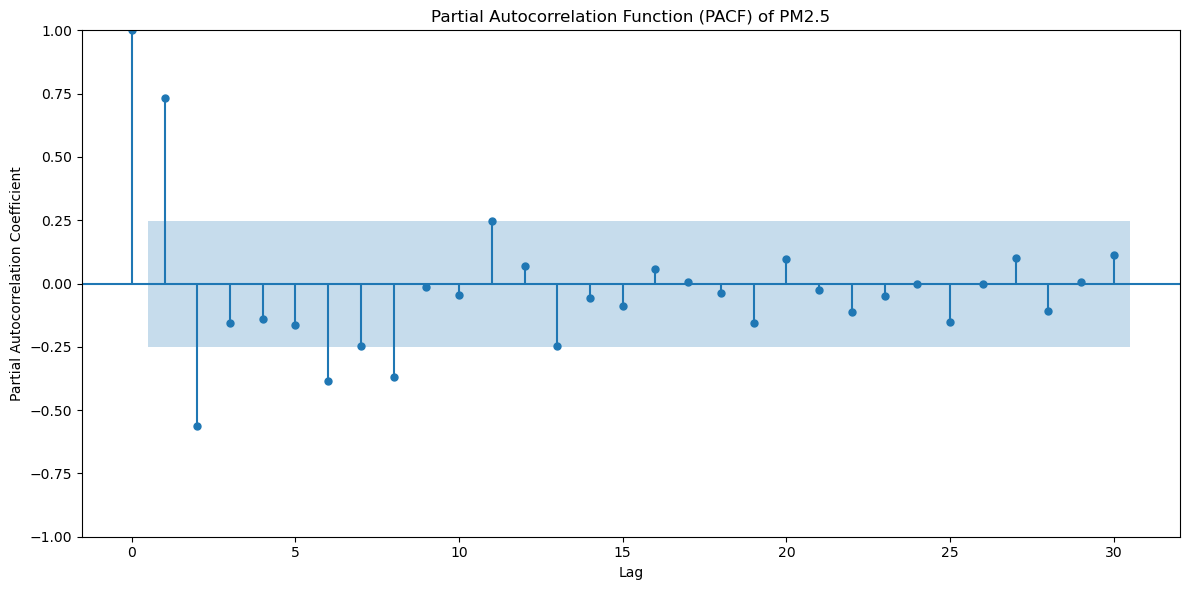

In [24]:
#ACF AND PACF PLOTS to understand lags and correlation

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Plot the Autocorrelation Function (ACF)
fig_acf, ax_acf = plt.subplots(figsize=(12, 6))
plot_acf(pm25_series, lags=30, ax=ax_acf)  # Adjust 'lags' as needed
ax_acf.set_title('Autocorrelation Function (ACF) of PM2.5')
ax_acf.set_xlabel('Lag')
ax_acf.set_ylabel('Autocorrelation Coefficient')
plt.tight_layout()
plt.show()

# Plot the Partial Autocorrelation Function (PACF)
fig_pacf, ax_pacf = plt.subplots(figsize=(12, 6))
plot_pacf(pm25_series, lags=30, ax=ax_pacf, method='ywmle')  # Adjust 'lags' as needed
ax_pacf.set_title('Partial Autocorrelation Function (PACF) of PM2.5')
ax_pacf.set_xlabel('Lag')
ax_pacf.set_ylabel('Partial Autocorrelation Coefficient')
plt.tight_layout()
plt.show()

In [25]:
#making the data stationary 
#differencing and seasonal differencing

monthly_avg_data['PM2.5_diff'] = monthly_avg_data['PM2.5 (ug/m3)'].diff().dropna()



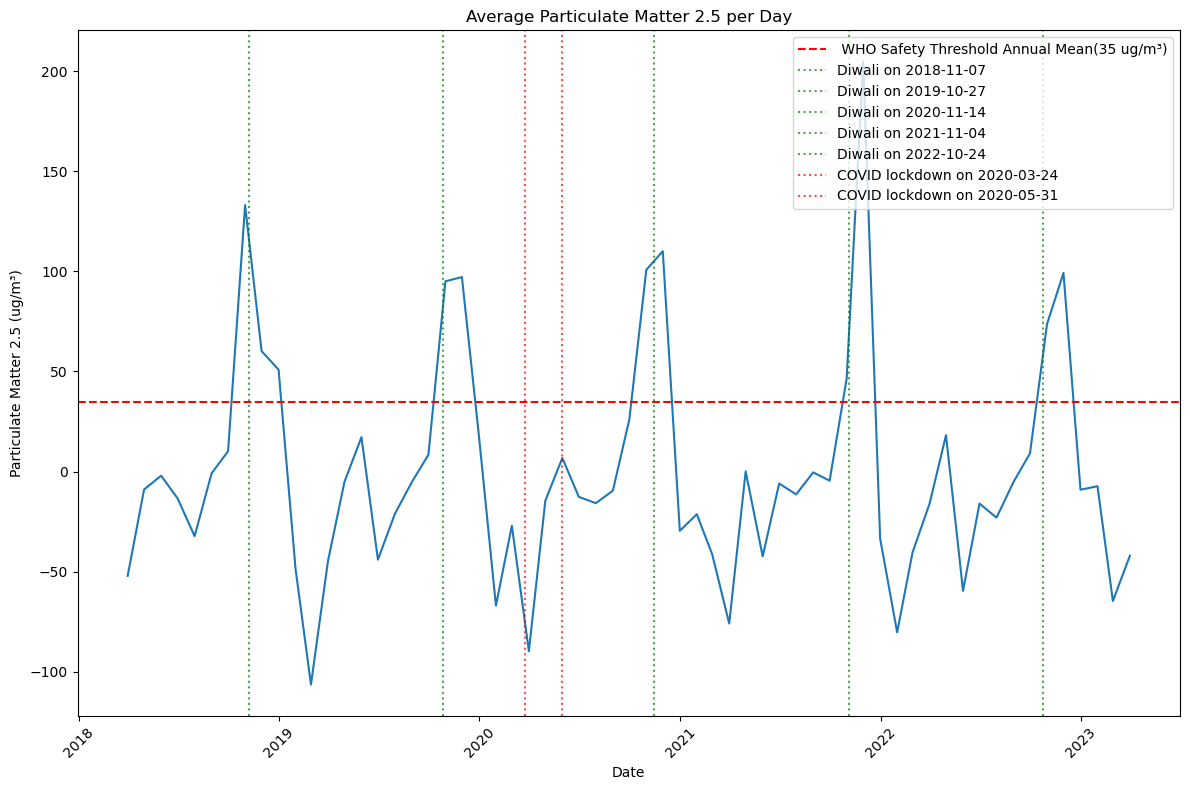

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(monthly_avg_data.index, monthly_avg_data['PM2.5_diff'])

# Add the horizontal line for the safety threshold
ax.axhline(y=35, color='r', linestyle='--', label=' WHO Safety Threshold Annual Mean(35 ug/m³)')

ax.set_title('Average Particulate Matter 2.5 per Day')
ax.set_xlabel('Date')
ax.set_ylabel('Particulate Matter 2.5 (ug/m³)')
ax.xaxis.set_tick_params(rotation=45)

# Add constant vertical lines for specific dates
important_dates = ['2018-11-07', '2019-10-27', '2020-11-14','2021-11-04','2022-10-24']  # Diwali dates

for date_str in important_dates:
    try:
        date_to_plot = pd.to_datetime(date_str)  # Convert string to datetime object (if index is datetime)
        ax.axvline(x=date_to_plot, color='g', linestyle=':', alpha=0.7, label=f'Diwali on {date_str}')
    except ValueError:
        print(f"Warning: Could not parse date string: {date_str}")

        
# Add constant vertical lines for specific dates
covid_dates = ['2020-03-24','2020-05-31']  # COVID lockdowns dates

for date_str in covid_dates:
    try:
        date_to_plot = pd.to_datetime(date_str)  # Convert string to datetime object (if index is datetime)
        ax.axvline(x=date_to_plot, color='r', linestyle=':', alpha=0.7, label=f'COVID lockdown on {date_str}')
    except ValueError:
        print(f"Warning: Could not parse date string: {date_str}")        
# To avoid duplicate labels in the legend, we can handle them more carefully
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Add a legend to explain the constant line
ax.legend()

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

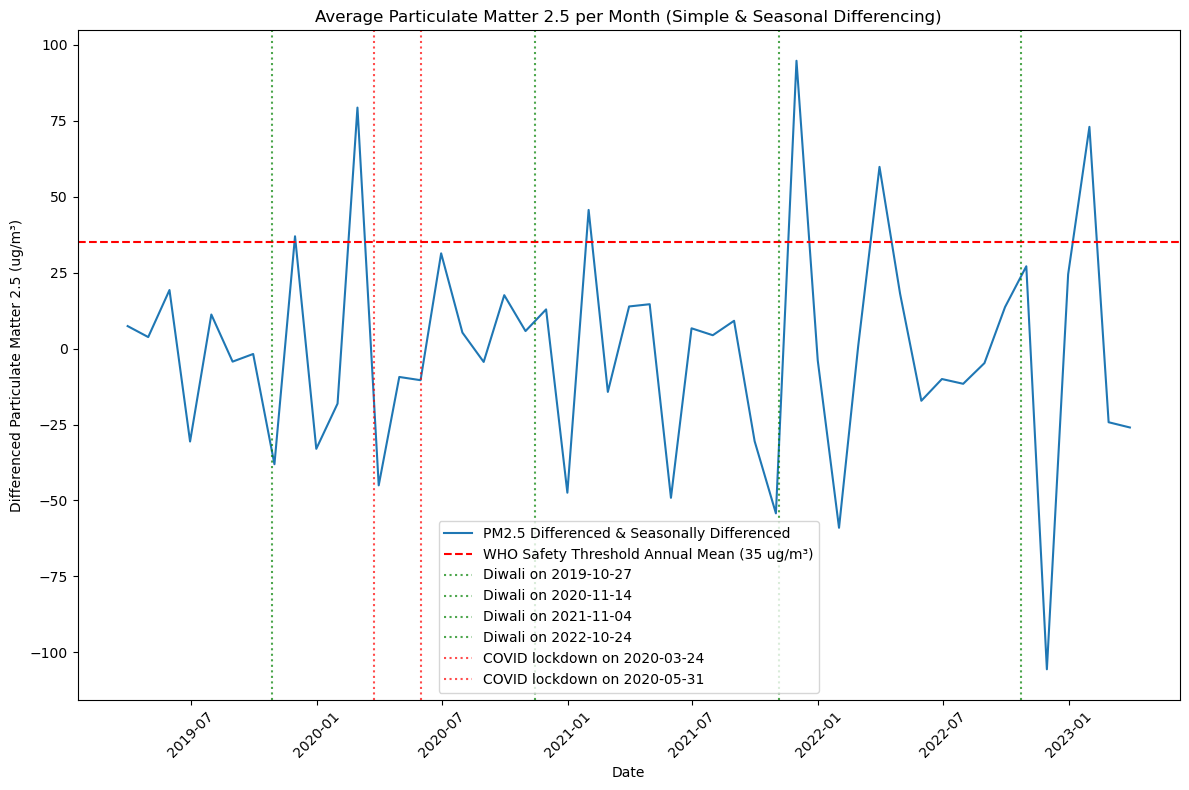

In [27]:
# Add Seasonal Differencing 
# Determine the seasonal period. For monthly data with annual seasonality, this is 12.
seasonal_period = 12

# Apply seasonal differencing to the already simply differenced series.
# This will create a new column representing the differenced and seasonally differenced data.
monthly_avg_data['PM2.5_diff_seasonal_diff'] = monthly_avg_data['PM2.5_diff'].diff(periods=seasonal_period)

# --- Filter the DataFrame to only include rows where the fully differenced data is not NaN ---
# This ensures that both the index and the data array have the same length
plot_data = monthly_avg_data.dropna(subset=['PM2.5_diff_seasonal_diff'])

fig, ax = plt.subplots(figsize=(12, 8))

# Plot the new, fully differenced series using the filtered plot_data
ax.plot(plot_data.index, plot_data['PM2.5_diff_seasonal_diff'], label='PM2.5 Differenced & Seasonally Differenced')

# Add the horizontal line for the safety threshold (Note: this threshold might not be as meaningful
# for differenced data, as differenced data represents changes, not absolute levels.
# You might want to remove this line if it causes confusion, or explain its context clearly.)
ax.axhline(y=35, color='r', linestyle='--', label='WHO Safety Threshold Annual Mean (35 ug/m³)')

# Set titles and labels for the new plot
ax.set_title('Average Particulate Matter 2.5 per Month (Simple & Seasonal Differencing)')
ax.set_xlabel('Date')
ax.set_ylabel('Differenced Particulate Matter 2.5 (ug/m³)')
ax.xaxis.set_tick_params(rotation=45)

# Add constant vertical lines for specific dates
important_dates = ['2018-11-07', '2019-10-27', '2020-11-14', '2021-11-04', '2022-10-24'] # Diwali dates

for date_str in important_dates:
    try:
        date_to_plot = pd.to_datetime(date_str)
        # Ensure the date is within the range of your monthly data for plotting
        # Also ensure it's within the range of the *plot_data* which starts later
        if date_to_plot.to_period('M') in plot_data.index.to_period('M'):
            ax.axvline(x=date_to_plot, color='g', linestyle=':', alpha=0.7, label=f'Diwali on {date_str}')
        # else:
        #     print(f"Warning: Diwali date {date_str} not in current plot range (after differencing).")
    except ValueError:
        print(f"Error: Could not parse date string: {date_str}")


covid_dates = ['2020-03-24', '2020-05-31'] # COVID lockdowns dates
for date_str in covid_dates:
    try:
        date_to_plot = pd.to_datetime(date_str)
        # Ensure the date is within the range of your monthly data for plotting
        if date_to_plot.to_period('M') in plot_data.index.to_period('M'):
            ax.axvline(x=date_to_plot, color='r', linestyle=':', alpha=0.7, label=f'COVID lockdown on {date_str}')
        # else:
        #     print(f"Warning: COVID date {date_str} not in current plot range (after differencing).")
    except ValueError:
        print(f"Error: Could not parse date string: {date_str}")

# To avoid duplicate labels in the legend, we can handle them more carefully
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [28]:
#Hypothesis test to determine if data is stationary now
from statsmodels.tsa.stattools import adfuller

pm25_series_1 = monthly_avg_data['PM2.5_diff_seasonal_diff'].dropna()

# Perform the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(pm25_series_1)

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

print('\nInterpretation:')
if adf_result[1] > 0.05:
    print('The p-value is greater than 0.05, so the null hypothesis (the time series is non-stationary) cannot be rejected.')
    print('The data is likely non-stationary.')
else:
    print('The p-value is less than or equal to 0.05, so the null hypothesis (the time series is non-stationary) is rejected.')
    print('The data is likely stationary.')


ADF Statistic: -3.160673712517566
p-value: 0.02237690435256719
Critical Values:
   1%: -3.6209175221605827
   5%: -2.9435394610388332
   10%: -2.6104002410518627

Interpretation:
The p-value is less than or equal to 0.05, so the null hypothesis (the time series is non-stationary) is rejected.
The data is likely stationary.


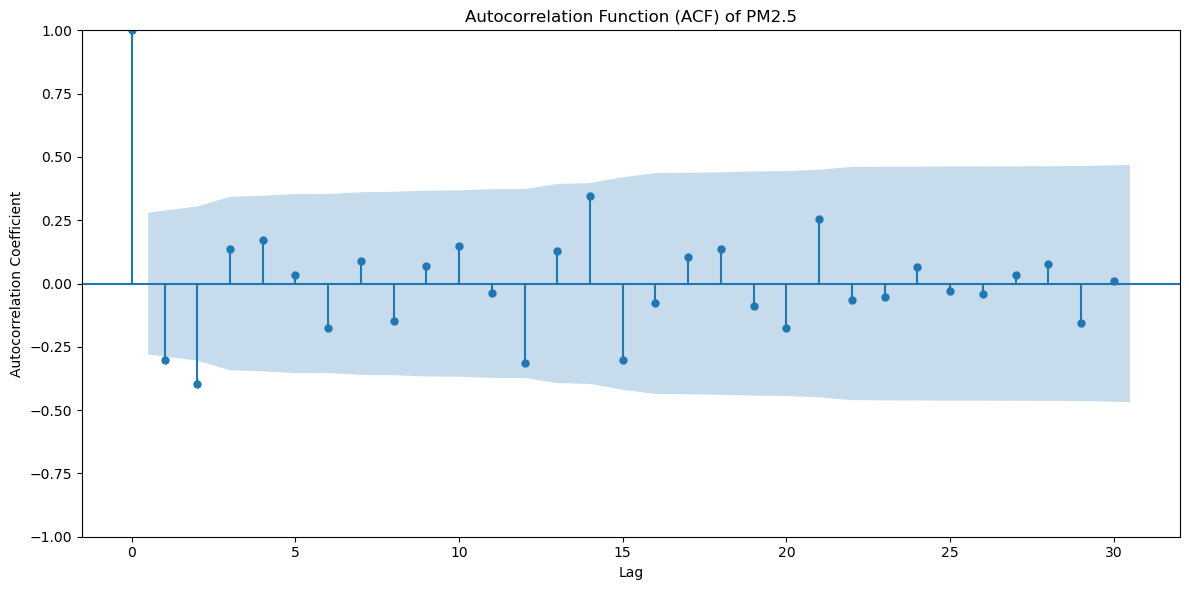

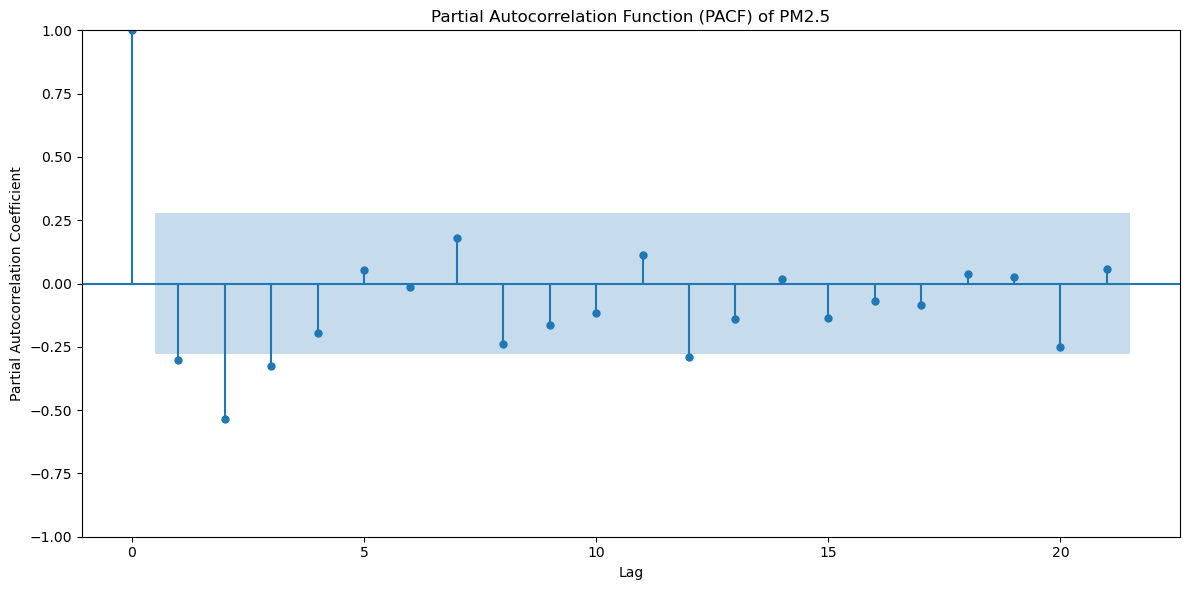

In [29]:
#new ACF and PACF plots
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Plot the Autocorrelation Function (ACF)
fig_acf, ax_acf = plt.subplots(figsize=(12, 6))
plot_acf(pm25_series_1, lags=30, ax=ax_acf)  # Adjust 'lags' as needed
ax_acf.set_title('Autocorrelation Function (ACF) of PM2.5')
ax_acf.set_xlabel('Lag')
ax_acf.set_ylabel('Autocorrelation Coefficient')
plt.tight_layout()
plt.show()

# Plot the Partial Autocorrelation Function (PACF)
fig_pacf, ax_pacf = plt.subplots(figsize=(12, 6))
plot_pacf(pm25_series_1, lags=21, ax=ax_pacf, method='ywmle')  # Adjust 'lags' as needed
ax_pacf.set_title('Partial Autocorrelation Function (PACF) of PM2.5')
ax_pacf.set_xlabel('Lag')
ax_pacf.set_ylabel('Partial Autocorrelation Coefficient')
plt.tight_layout()
plt.show()

In [30]:
df= monthly_avg_data[['PM2.5 (ug/m3)']]

print(f"Total number of rows in the dataset: {len(df)}")

Total number of rows in the dataset: 62


In [31]:
display(df.head())

,PM2.5 (ug/m3)
Date,
2018-02-28,153.723750
2018-03-31,101.643011
2018-04-30,92.710875
2018-05-31,90.663763
2018-06-30,77.283028


In [32]:
df.index = pd.to_datetime(df.index)
if df.index.freq is None:
    df = df.asfreq(pd.infer_freq(df.index))

CREATING SARIMA MODEL

In [33]:
# --- Calculate Split Point ---
train_size = int(len(df) * 0.90) # 80% for training
# test_size = len(df) - train_size # 20% for testing (or calculate as int(len(df) * 0.20))

print(f"Number of rows for training: {train_size}")
print(f"Number of rows for testing: {len(df) - train_size}") # This is more accurate for the remainder

# --- Slice the DataFrame ---
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]




Number of rows for training: 55
Number of rows for testing: 7


In [34]:
if train_df.index.freq is None:
    train_df = train_df.asfreq(df.index.freq)
if test_df.index.freq is None:
    test_df = test_df.asfreq(df.index.freq)

In [56]:
#intialising the model, the numbers you see have been edited after checking the model metrics below
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 2
d = 1
q = 1

P = 1
D = 1
Q = 1
S = 12

# build the model
sarima = SARIMAX(train_df, order=(p, d, q), seasonal_order = (P, D, Q, S)).fit()

# make a forecast to compare to the test data

test_df['SARIMA'] = sarima.forecast(len(test_df))

C:\Users\ashish.sharma\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\ashish.sharma\AppData\Local\Temp\ipykernel_16444\1938356549.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['SARIMA'] = sarima.forecast(len(test_df))


In [36]:
print(f"Frequency of train_df index: {train_df.index.freq}")
print(f"Frequency of test_df index: {test_df.index.freq}")
print(f"Frequency of forecast_mean index: {test_df['SARIMA'].index.freq}")
print(f"Frequency of forecast_ci index: {test_df['SARIMA'].index.freq}")

Frequency of train_df index: <MonthEnd>
Frequency of test_df index: <MonthEnd>
Frequency of forecast_mean index: <MonthEnd>
Frequency of forecast_ci index: <MonthEnd>


VISUALISING SARIMA MODEL

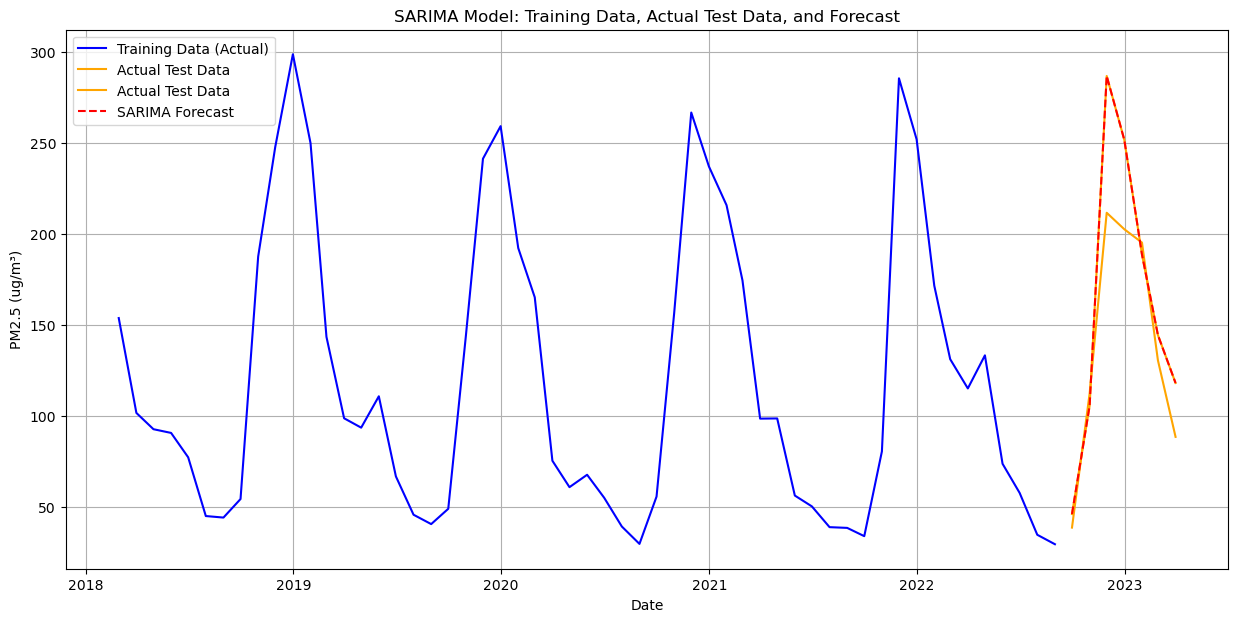

In [57]:

plt.figure(figsize=(15, 7))

# Plot training data
plt.plot(train_df.index, train_df, label='Training Data (Actual)', color='blue')

# Plot actual test data
plt.plot(test_df.index, test_df, label='Actual Test Data', color='orange')

# Plot SARIMA Forecast
plt.plot(test_df['SARIMA'].index, test_df['SARIMA'], color='red', linestyle='--', label='SARIMA Forecast')



plt.title('SARIMA Model: Training Data, Actual Test Data, and Forecast')
plt.xlabel('Date')
plt.ylabel('PM2.5 (ug/m³)')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
#Error Metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual_values= test_df['PM2.5 (ug/m3)']
predicted_values = test_df['SARIMA']

rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)


print(f"\n--- Forecast Evaluation Metrics ---")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")


--- Forecast Evaluation Metrics ---
RMSE (Root Mean Squared Error): 36.35
MAE (Mean Absolute Error): 26.90


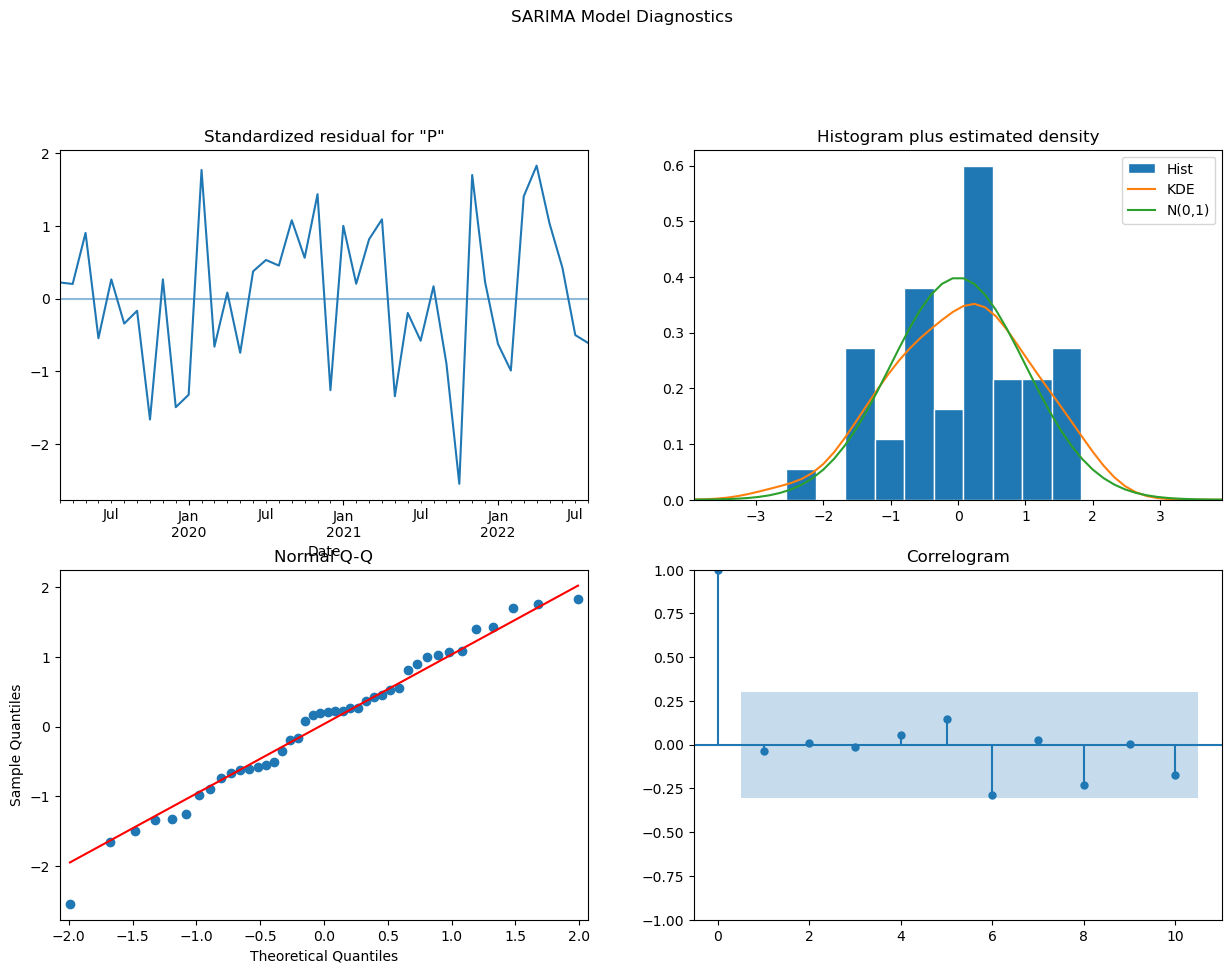

C:\Users\ashish.sharma\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


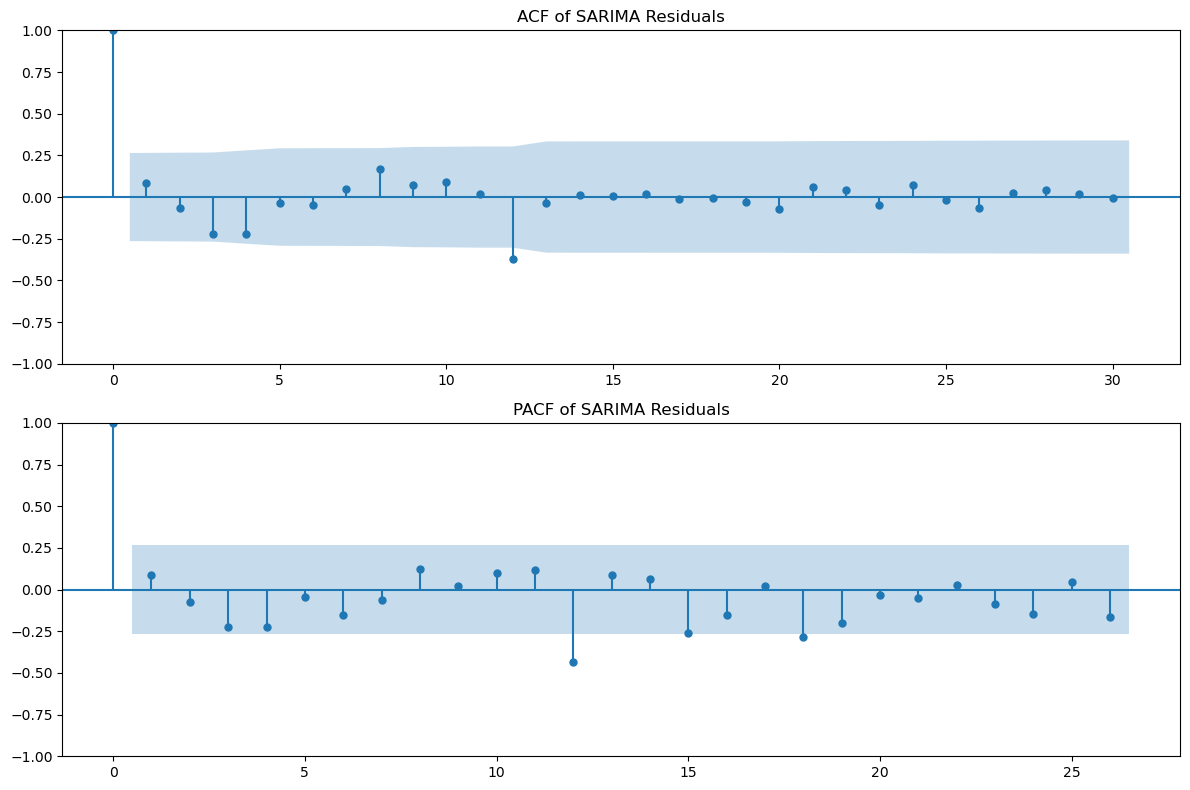

In [59]:
# Get the residuals from the fitted model
residuals = sarima.resid

# Plot the diagnostics, which includes residual plot, histogram, Q-Q plot, and Correlogram (ACF)
sarima.plot_diagnostics(figsize=(15, 10))
plt.suptitle('SARIMA Model Diagnostics', y=1.02) # Adjust title position
plt.show()

# Plot ACF and PACF of the residuals separately for clearer analysis
plt.figure(figsize=(12, 8))

plt.subplot(211) # 2 rows, 1 column, 1st plot
plot_acf(residuals, lags=30, ax=plt.gca(), title='ACF of SARIMA Residuals')

plt.subplot(212) # 2 rows, 1 column, 2nd plot
plot_pacf(residuals, lags=26, ax=plt.gca(), title='PACF of SARIMA Residuals')

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
#To do- clearly some issues remain with the model with regards to the information provided by the ACF PACD of SARIMA residuals.

